# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [117]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [118]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
# cities = ["Chicago","Dallas","New York","Oklahoma","San Francisco","Detroit"]
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    weather_response = requests.get(city_url)

    try:
        # Parse the JSON and retrieve data
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, 
        # country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | antsiranana
Processing Record 7 of Set 1 | labytnangi
Processing Record 8 of Set 1 | khandyga
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | usogorsk
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | haiku-pauwela
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | huazhou
Processing Record 18 of Set 1 | puerto baquerizo moreno
Processing Record 19 of Set 1 | itigi
Processing Record 20 of Set 1 | tanout
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Set 1 | 

In [160]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df["Max Temp"] = city_data_df["Max Temp"]-273.15 


# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [161]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.00,74,29,7.49,PN,1722723842
1,port-aux-francais,-49.3500,70.2167,1.90,90,23,11.83,TF,1722723843
2,punta arenas,-53.1500,-70.9167,0.62,80,100,4.19,CL,1722723844
3,iqaluit,63.7506,-68.5145,4.85,80,20,7.72,CA,1722723789
4,ilulissat,69.2167,-51.1000,11.01,54,4,0.00,GL,1722723846


In [162]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [163]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.00,74,29,7.49,PN,1722723842
1,port-aux-francais,-49.3500,70.2167,1.90,90,23,11.83,TF,1722723843
2,punta arenas,-53.1500,-70.9167,0.62,80,100,4.19,CL,1722723844
3,iqaluit,63.7506,-68.5145,4.85,80,20,7.72,CA,1722723789
4,ilulissat,69.2167,-51.1000,11.01,54,4,0.00,GL,1722723846


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

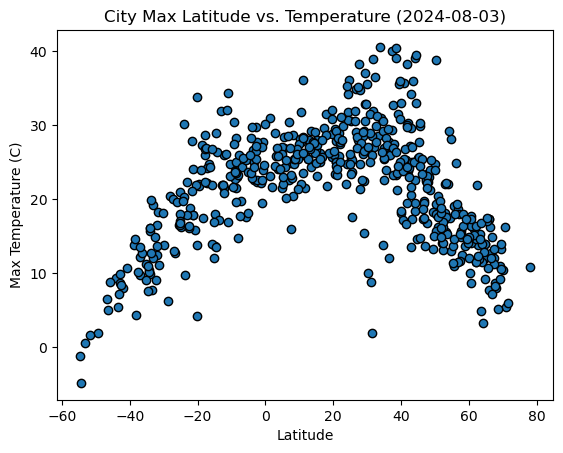

In [164]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

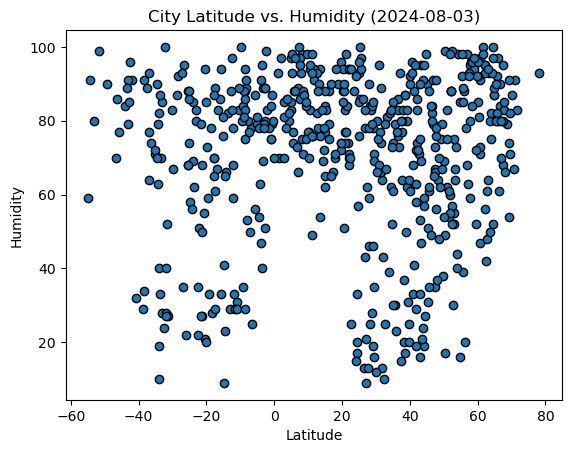

In [165]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

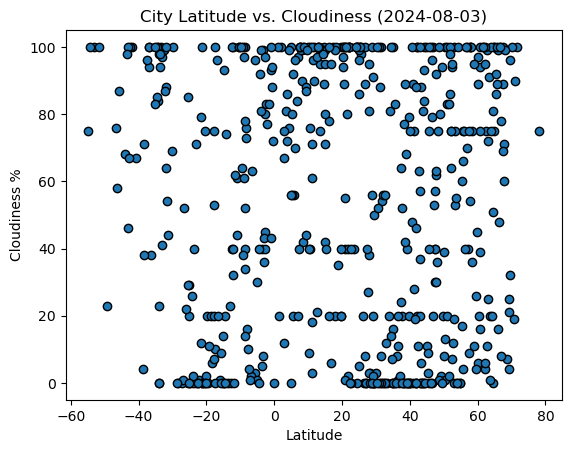

In [166]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

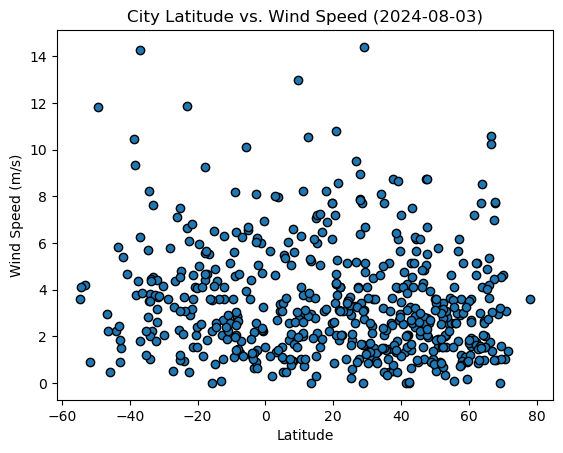

In [167]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values, edgecolors='black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [168]:
# Define a function to create Linear Regression plots

def plot_chart(x,y,descx,descy,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    
    plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', fontsize=15, color="red")
    plt.xlabel(descx)
    plt.ylabel(descy)
    plt.title(title)
    # Calculate r^2 value
    r_squared = rvalue ** 2
    print(f"The r^2 value is: {r_squared}")


In [169]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]
# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,iqaluit,63.7506,-68.5145,4.85,80,20,7.72,CA,1722723789
4,ilulissat,69.2167,-51.1000,11.01,54,4,0.00,GL,1722723846
6,labytnangi,66.6572,66.4183,12.75,84,100,10.60,RU,1722723849
7,khandyga,62.6667,135.6000,13.78,61,99,0.85,RU,1722723850
8,kodiak,57.7900,-152.4072,15.73,59,100,3.60,US,1722723851


In [170]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.00,74,29,7.49,PN,1722723842
1,port-aux-francais,-49.3500,70.2167,1.90,90,23,11.83,TF,1722723843
2,punta arenas,-53.1500,-70.9167,0.62,80,100,4.19,CL,1722723844
5,antsiranana,-12.2787,49.2917,21.51,59,32,6.30,MG,1722723847
9,grytviken,-54.2811,-36.5092,-4.82,91,100,4.10,GS,1722723852


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.3747286781963845


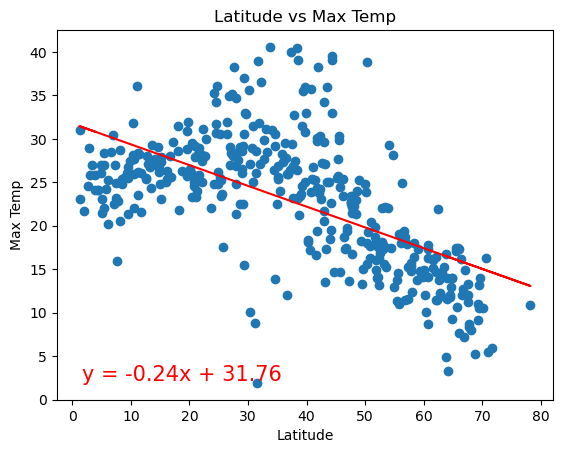

In [171]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_chart(x_values, y_values,"Latitude","Max Temp","Latitude vs Max Temp")


The r^2 value is: 0.6470877207919734


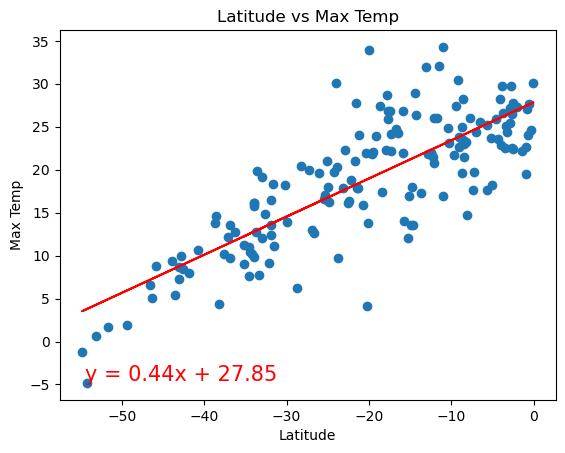

In [172]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_chart(x_values, y_values,"Latitude","Max Temp","Latitude vs Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


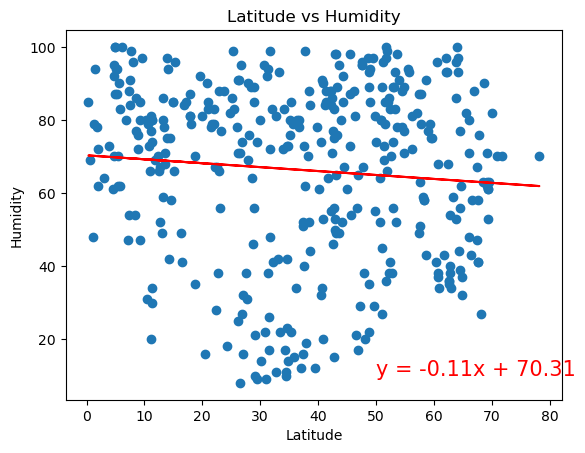

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


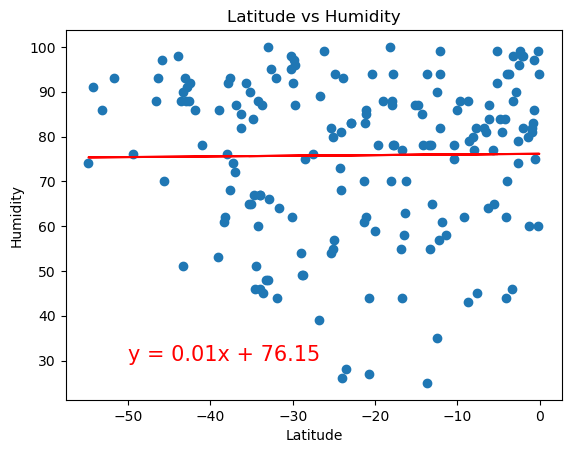

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


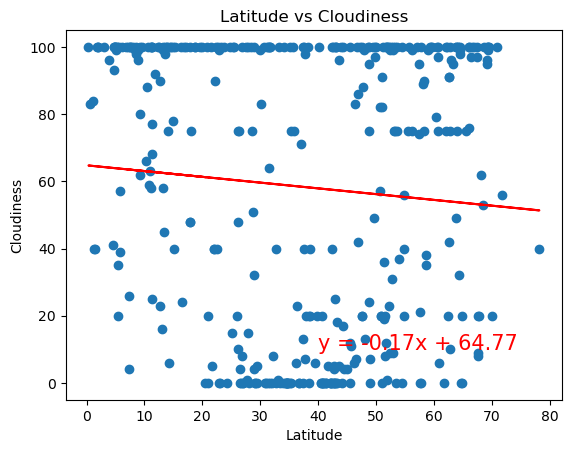

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


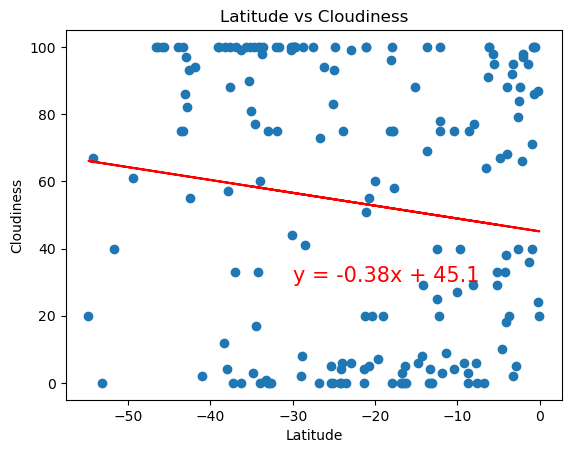

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


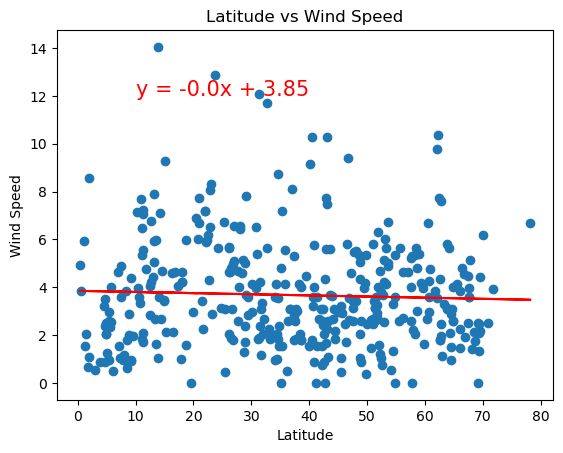

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


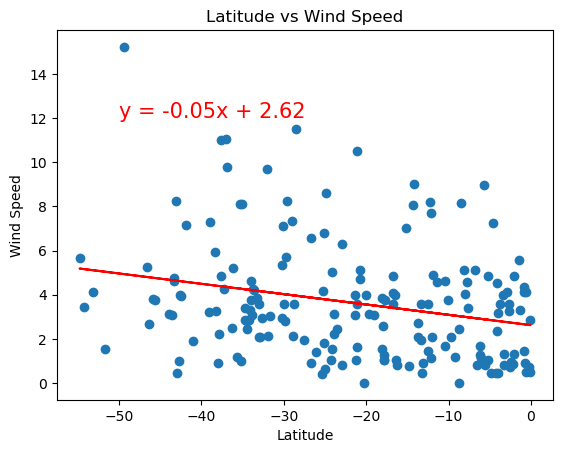

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE